# Nigeria Economic Variable Correlation and Productivity Model


## Objectives

* To conduct a financial analysis based on the correlation between key economic variables such as M1 money supply, real exchange rate (black market), country stock market performance, and inflation rates.
* To understand how each variable affects productivity.

## Project Sections
1. [Data Collection and Preparation](#description)<br>
2. [Correlation Analysis](#correlation)<br>
    2.1 [ Time series plots for each variable](#timeseries)<br>
    2.2 [ Correlation Matrix showing the correlation between each variable](#correlationmatrix)<br>
    2.3 [ Money supply againts other variables](#M1vsVariables)<br>
    2.4 [ Time-Shifted Correlations](#timeshiftedcorrelation)<br>
3. [Productivity Model](#productivitymodel)<br>
    3.1 [ Model Evaluation](#evaluation)<br>
    3.2 [ Model Interpretation](#modelinterpretation)<br>
4. [Productivity Baseline](#productivitybaseline)<br>
5. [Currency Devaluation](#currencydevaluation)
6. [Conclusion](#conclusion)<br>

## Data Collection and Preparation <a id="description"></a>

Dataset was sourced as follows
* Stock market data: https://ng.investing.com/indices/nse-all-share-historical-data
* Exchange rate data: https://ng.investing.com/currencies/usd-ngn-historical-data
* M1 data: https://www.cbn.gov.ng/rates/mnycredit.asp (cbn.gov.ng)
* Inflation rates: https://www.cbn.gov.ng/rates/inflrates.asp

Thereafter each dataset was cleaned up, adjusted for different time format, standardized to same time range and merged into a single dataframe. The data contains historical monthly averages of M1 money supply, country stock market performance, real exchanage rate and inflation rate from January 2005 to May 2024,

In [210]:
# import required packages
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [224]:
# load data
df = pd.read_excel('Data.xlsx')

In [225]:
df.head()

,Year,Month,Inflation,M1,StockMarketPerformance (USD),Exchange Rate (Parallel)
0,2005,1,9.8,1373084.1,122.1973,132.25
1,2005,2,10.9,1394971.5,116.8256,131.75
2,2005,3,16.3,1469579.9,109.3781,131.65
3,2005,4,17.9,1404892.2,110.9449,131.75
4,2005,5,16.8,1442715.6,112.3209,131.85


In [226]:
# combine year, month and day as datetime
df['date'] = pd.to_datetime(df.assign(day=1)[['Year', 'Month', 'day']])

In [227]:
df.set_index('date', inplace=True)

In [228]:
df1 = df.drop(columns=['Year', 'Month'], axis=1)

<br/>

## Correlation Analysis <a id="correlation"></a>

* ### Time series plots for each variable <a id="timeseries"></a>

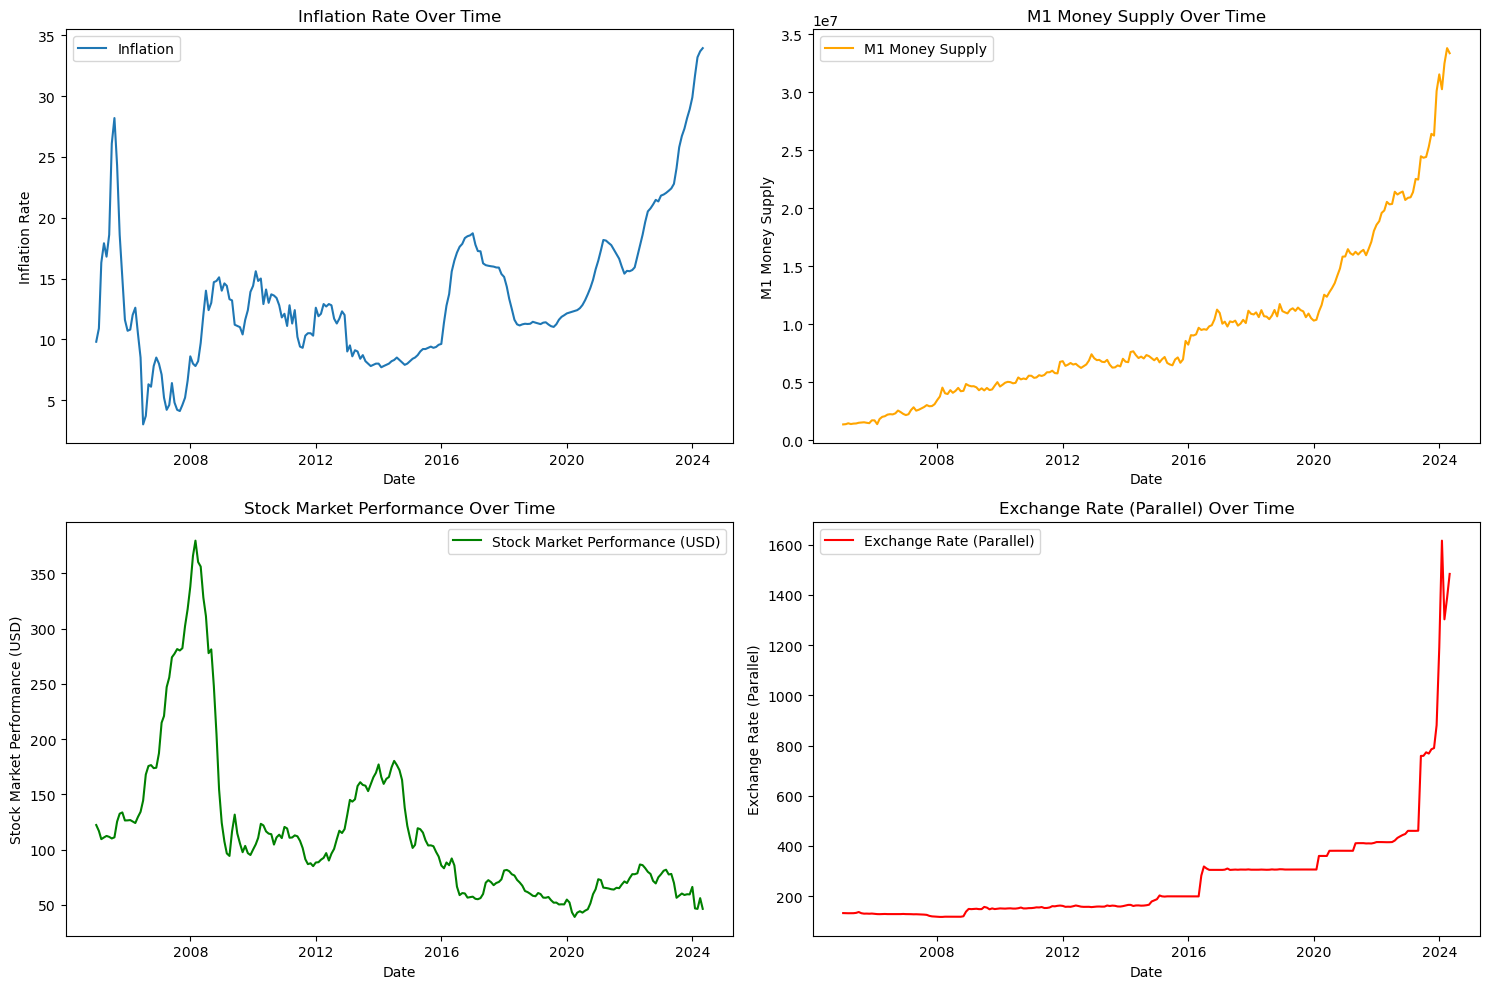

In [229]:
# Plot the time series for each variable
plt.figure(figsize=(15, 10))

# Plot Inflation
plt.subplot(2, 2, 1)
plt.plot(df1.index, df1['Inflation'], label='Inflation')
plt.title('Inflation Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()


# Plot M1 Money Supply
plt.subplot(2, 2, 2)
plt.plot(df1.index, df1['M1'], label='M1 Money Supply', color='orange')
plt.title('M1 Money Supply Over Time')
plt.xlabel('Date')
plt.ylabel('M1 Money Supply')
plt.legend()


# Plot Stock Market Performance
plt.subplot(2, 2, 3)
plt.plot(df1.index, df1['StockMarketPerformance (USD)'], label='Stock Market Performance (USD)', color='green')
plt.title('Stock Market Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Market Performance (USD)')
plt.legend()

# Plot Exchange Rate (Parallel)
plt.subplot(2, 2, 4)
plt.plot(df1.index, df1['Exchange Rate (Parallel)'], label='Exchange Rate (Parallel)', color='red')
plt.title('Exchange Rate (Parallel) Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate (Parallel)')
plt.legend()

plt.tight_layout()
plt.show()

<br/>

* ### Correlation Matrix showing the correlation between each variable <a id="correlationmatrix"></a>

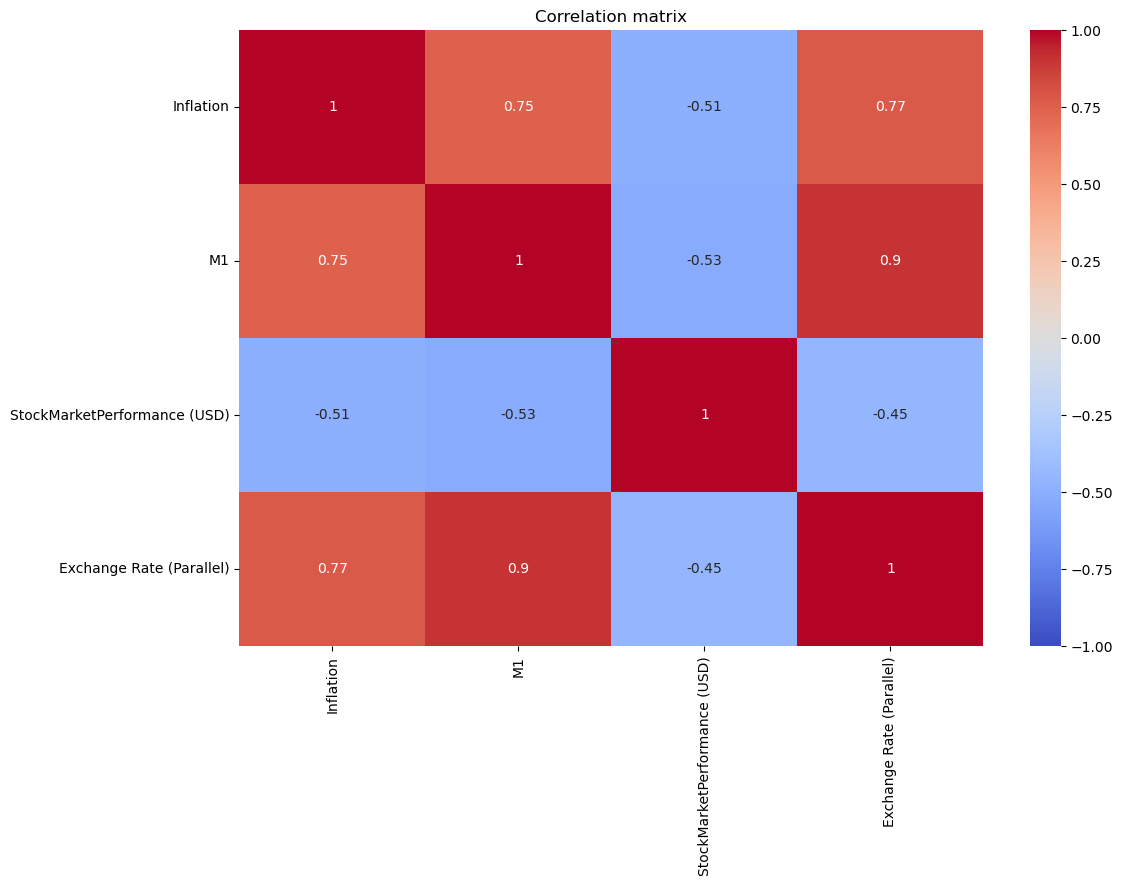

In [230]:
# check for correllation between variables
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), vmax=1, vmin=-1, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

* **INSIGHTS**<br>
There is a strong positive correlation between M1 and Exchange rate, Inflation and Exchange rate, and M1 and Inflation while we have a moderate negative correlation between M1 and Stock Market Performance, Inflation and Stock Market Performance, and Exchange rate and Stock Market Performance. All the other three variables are all negatively correlated with Stock Market Performance.

<br/>

* ### Money supply against other variables<a id="M1vsVariables"></a>

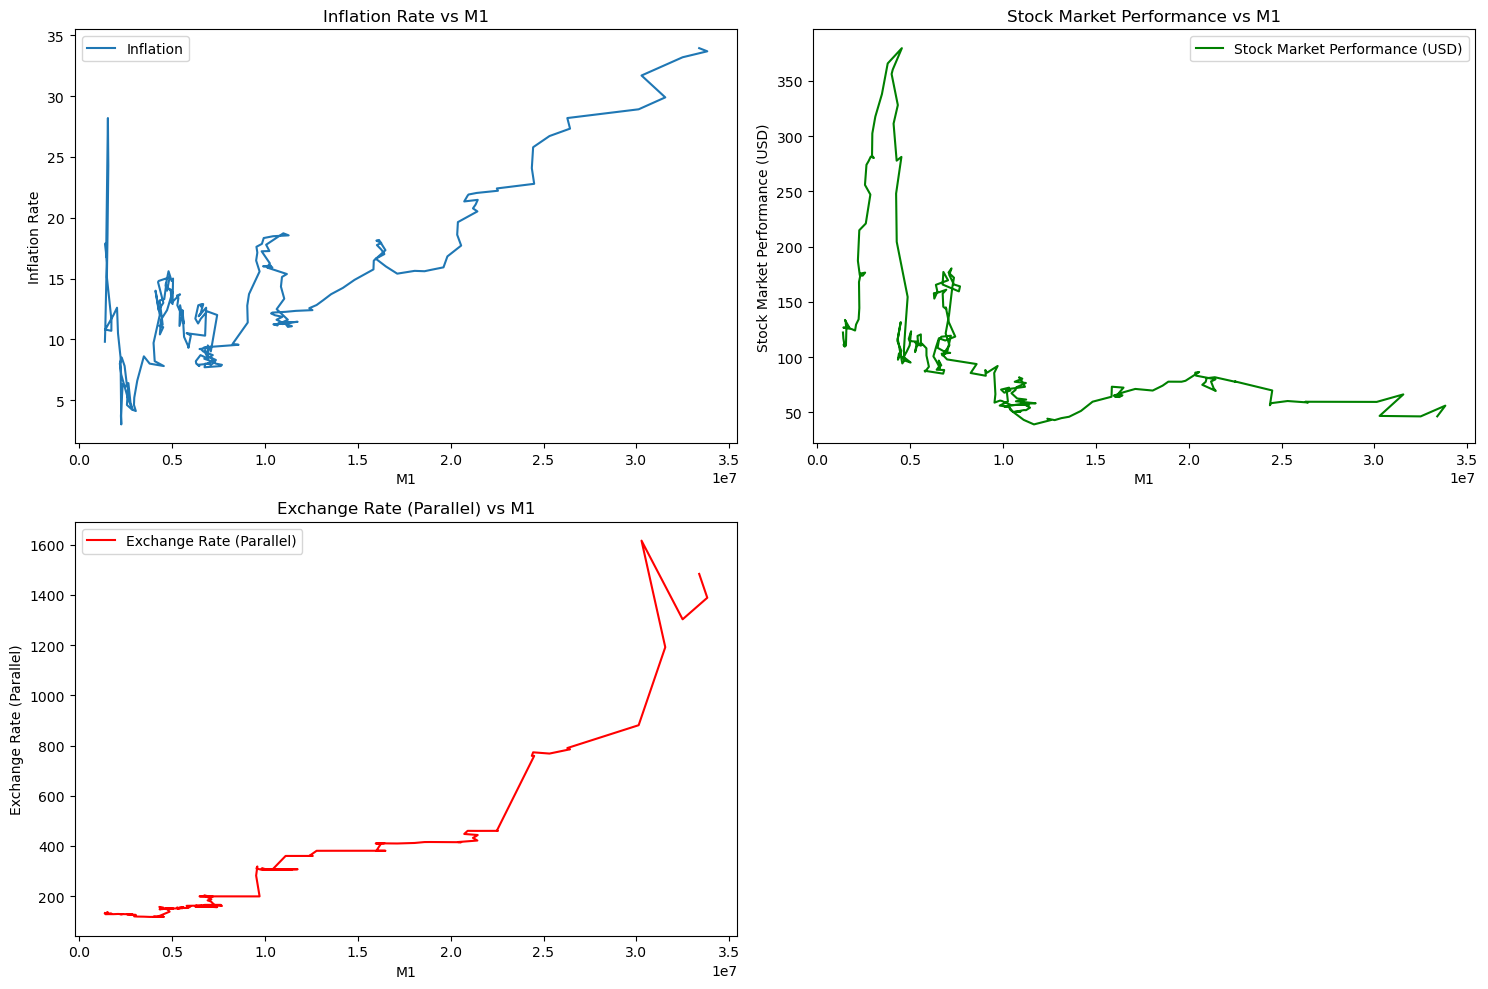

In [231]:
plt.figure(figsize=(15, 10))

# Plot Inflation vs M1
plt.subplot(2, 2, 1)
plt.plot(df1['M1'], df1['Inflation'], label='Inflation')
plt.title('Inflation Rate vs M1')
plt.xlabel('M1')
plt.ylabel('Inflation Rate')
plt.legend()


# Plot Stock Market Performance vs M1
plt.subplot(2, 2, 2)
plt.plot(df1['M1'], df1['StockMarketPerformance (USD)'], label='Stock Market Performance (USD)', color='green')
plt.title('Stock Market Performance vs M1')
plt.xlabel('M1')
plt.ylabel('Stock Market Performance (USD)')
plt.legend()

# Plot Exchange Rate (Parallel) vs M1
plt.subplot(2, 2, 3)
plt.plot(df1['M1'], df1['Exchange Rate (Parallel)'], label='Exchange Rate (Parallel)', color='red')
plt.title('Exchange Rate (Parallel) vs M1')
plt.xlabel('M1')
plt.ylabel('Exchange Rate (Parallel)')
plt.legend()

plt.tight_layout()
plt.show()


* **INSIGHTS**<br>
The correlation matrix and the above plots indicate that with other variables remaining stable, increased money supply leads to currency depreciation, moderate stock market depreciation, and increased inflation. 

<br/>

* ### Time-Shifted Correlations <a id="timeshiftedcorrelation"></a>

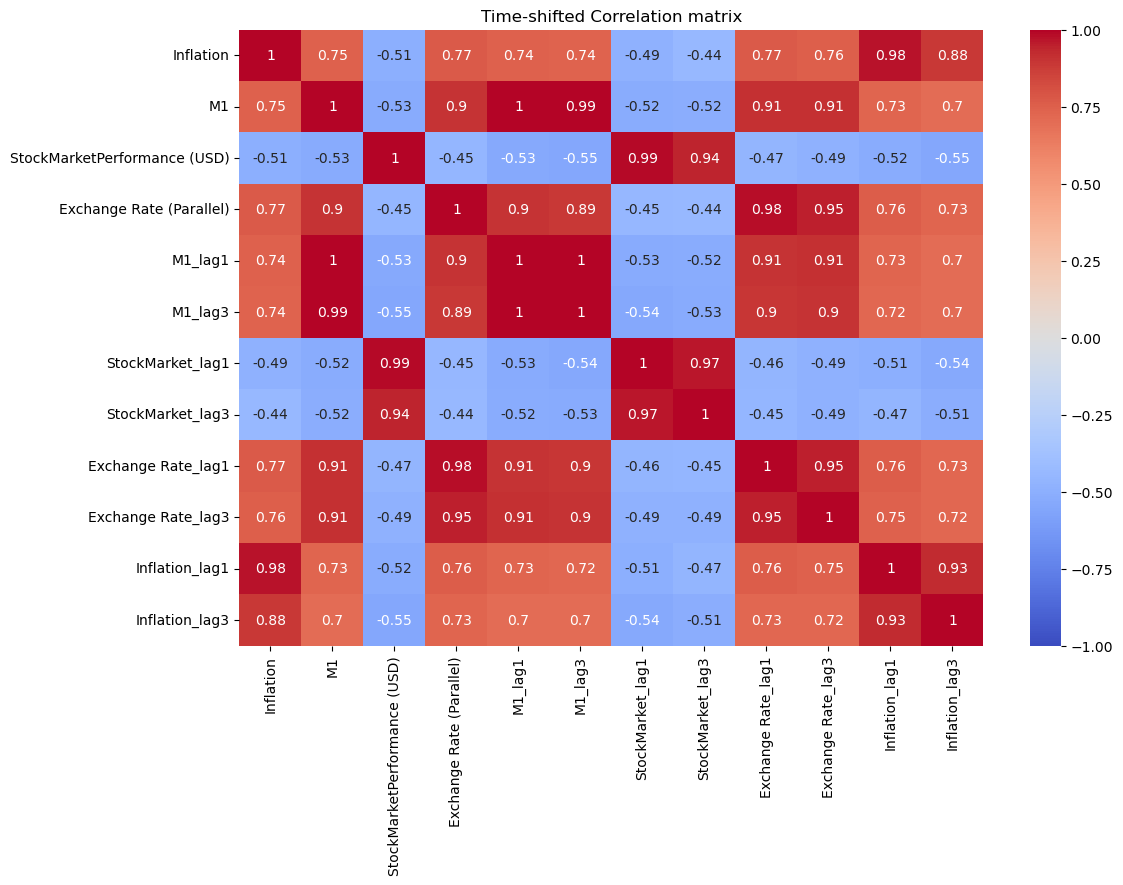

In [237]:
df2 = df1.copy()

# Create lagged versions of the variables
df2['M1_lag1'] = df2['M1'].shift(1)
df2['M1_lag3'] = df2['M1'].shift(3)

# Repeat for other variables as needed
df2['StockMarket_lag1'] = df2['StockMarketPerformance (USD)'].shift(1)
df2['StockMarket_lag3'] = df2['StockMarketPerformance (USD)'].shift(3)

df2['Exchange Rate_lag1'] = df2['Exchange Rate (Parallel)'].shift(1)
df2['Exchange Rate_lag3'] = df2['Exchange Rate (Parallel)'].shift(3)

df2['Inflation_lag1'] = df2['Inflation'].shift(1)
df2['Inflation_lag3'] = df2['Inflation'].shift(3)


# Calculate correlations with lagged variables
plt.figure(figsize=(12, 8))
lagged_correlation_matrix = df2.corr()
sns.heatmap(lagged_correlation_matrix, annot=True, vmax=1, vmin=-1,cmap='coolwarm')
plt.title('Time-shifted Correlation matrix')
plt.show()

* **INSIGHT**<br>
The time-adjusted correlation matrix shows a strong but gradual diminishing correlation between a variable and the other over time. For example, Inflation correlation value with exchange rate is 0.77 but diminishes to 0.74 after 3 months

<br>

In [238]:
from statsmodels.tsa.stattools import ccf

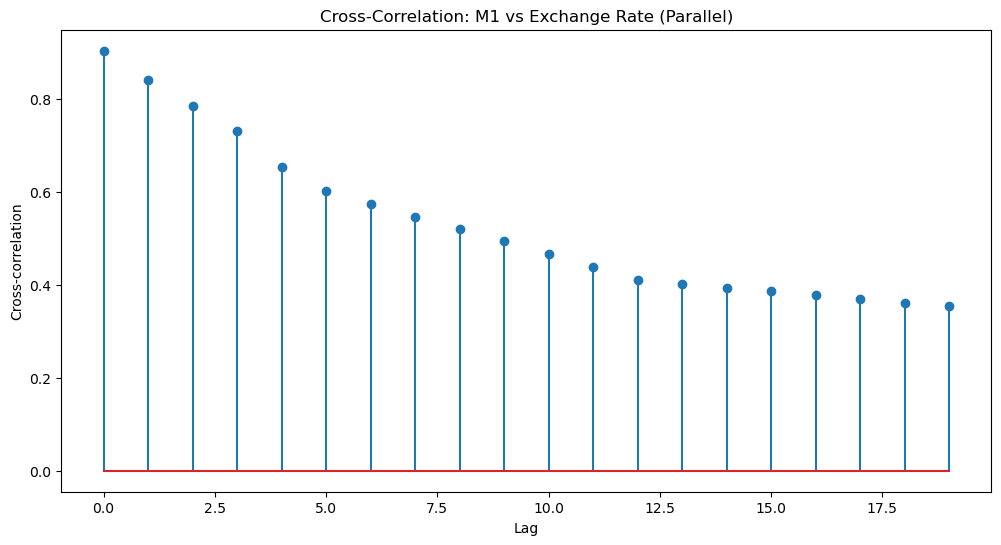

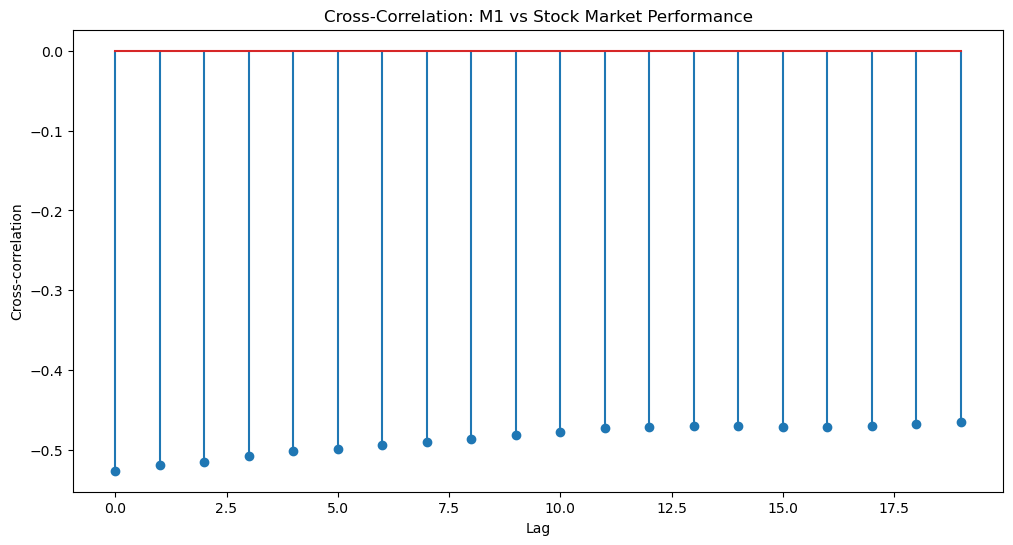

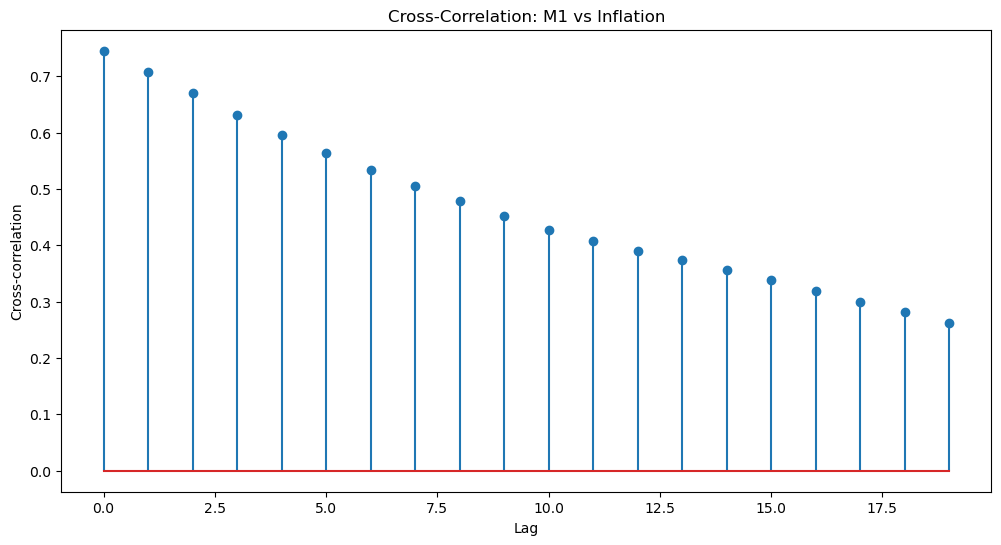

In [239]:
# Function to plot cross-correlation
def plot_cross_correlation(x, y, lags, title):
    correlation = ccf(x, y, adjusted=False)[:lags]
    plt.figure(figsize=(12, 6))
    plt.stem(range(lags), correlation, use_line_collection=True)
    plt.xlabel('Lag')
    plt.ylabel('Cross-correlation')
    plt.title(title)
    plt.show()

# Perform cross-correlation analysis
plot_cross_correlation(df2['M1'], df2['Exchange Rate (Parallel)'], 20, 'Cross-Correlation: M1 vs Exchange Rate (Parallel)')
plot_cross_correlation(df2['M1'], df2['StockMarketPerformance (USD)'], 20, 'Cross-Correlation: M1 vs Stock Market Performance')
plot_cross_correlation(df2['M1'], df2['Inflation'], 20, 'Cross-Correlation: M1 vs Inflation')

* **INSIGHTS**<b>
    
For the plots **M1 vs Exchange Rate** and **M1 vs Inflation** the highest cross-correlation values is at lag 0, indicating a strong relationship between M1 and the exchange rate and Inflation rate respectively at the time period. As the lag increases the cross-correlation gradually decreases. The descending pattern of cross-correlation values as the lag increases indicates that the impact of M1 on the exchange rate and inflation is strongest in the curent period and diminishes over time.<br><br>
For plot **M1 vs Stock Market Performance**, the cross-correlation value value at lg 0 is around -0.5, indicating a moderate negative correlation between M1 and stock market performance at the same time period. The cross-correlation values remain consistently around -0.5 for all lags up to 18. This indicates the negative relationship between M1 and stock market performance persists over time,  which implies that the changes in the money supply have a lasting negative effect on the stock market, regardless of the time lag.

<br/>

## Productivity Model <a id="productivitymodel"></a>

In [242]:
# calculate productivity using Exchange Rate, StockMarketPerformance and Inflation rate
df2['productivity'] =(df2['Exchange Rate (Parallel)']*df2['StockMarketPerformance (USD)'])/(df2['Inflation']/100)

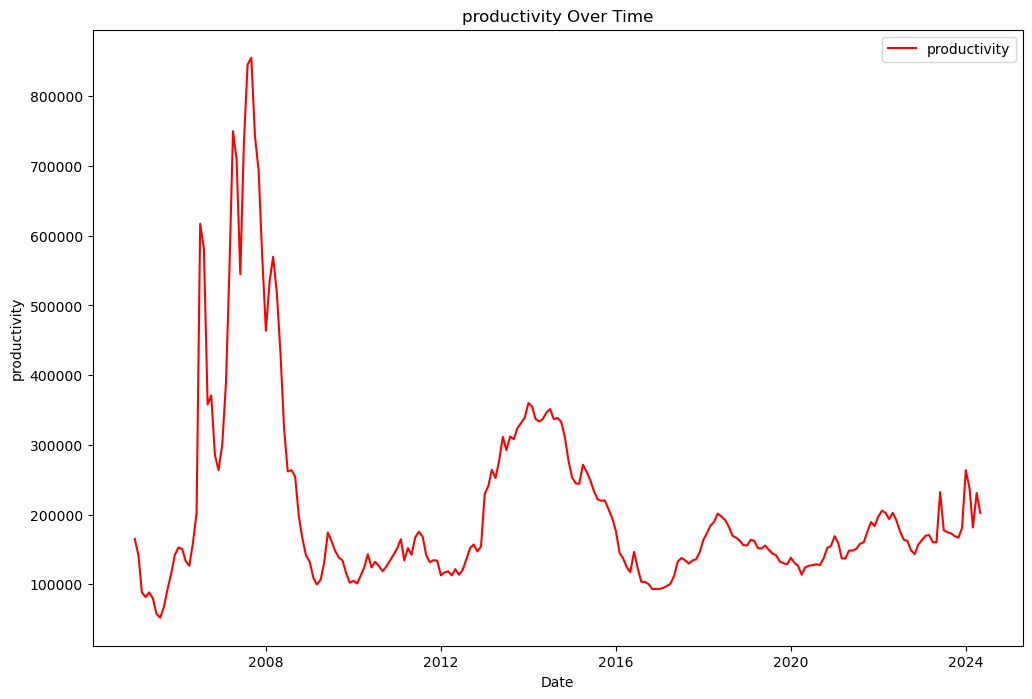

In [246]:
# visualize productivity against time
plt.figure(figsize=(12, 8))
plt.plot(df2.index, df2['productivity'], label='productivity', color='red')
plt.title('productivity Over Time')
plt.xlabel('Date')
plt.ylabel('productivity')
plt.legend()

* **INSIGHT**<br>
Productivity rose sharply around 2007 and fell sharply again around 2009. It rose again around 2013 and fell in 2016. Since 2016, it has remained relatively stable. 

In [247]:
# import required packages for model construction
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

In [248]:
df2_scaled = df2.copy()
scaler = StandardScaler()
df2_scaled[['M1', 'Exchange Rate (Parallel)', 'StockMarketPerformance (USD)','Inflation', 'productivity']] = scaler.fit_transform(df2[['M1', 'Exchange Rate (Parallel)', 'StockMarketPerformance (USD)','Inflation', 'productivity']])

In [250]:
# Define the independent variables (X) and the dependent variable (y)
X = df2_scaled[['M1', 'Exchange Rate (Parallel)', 'StockMarketPerformance (USD)','Inflation']]
y = df2_scaled['productivity']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           productivity   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     236.9
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           5.90e-80
Time:                        15:06:57   Log-Likelihood:                -139.55
No. Observations:                 233   AIC:                             289.1
Df Residuals:                     228   BIC:                             306.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<br>

* ### Model evaluation <a id="evaluation"></a>

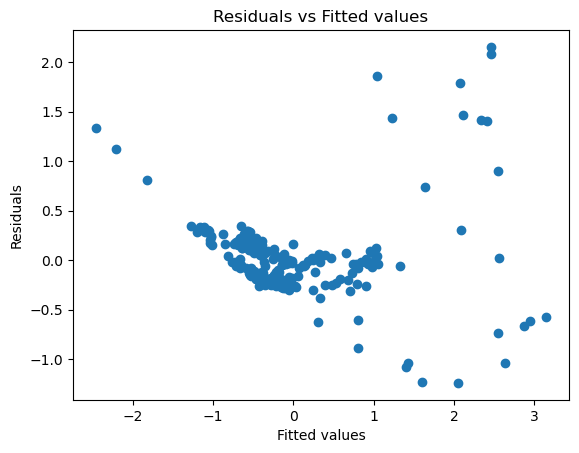

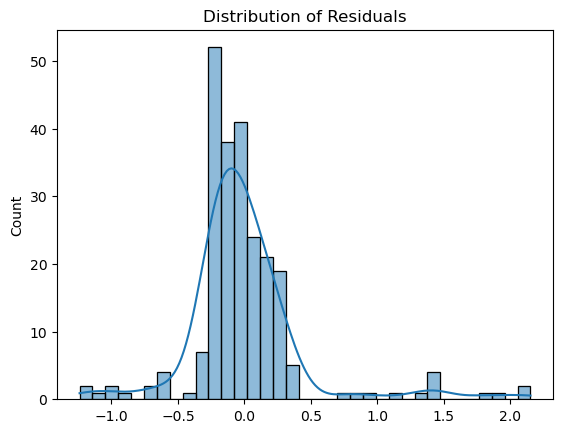

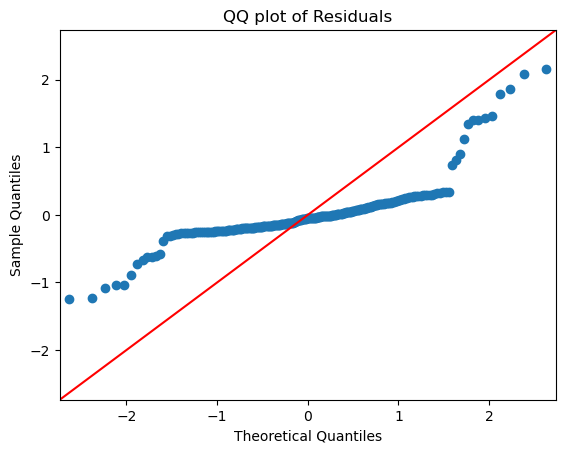

In [254]:
# Residuals plot
plt.scatter(model.fittedvalues, model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Histogram of residuals
sns.histplot(model.resid, kde=True)
plt.title('Distribution of Residuals')
plt.show()

# QQ plot
sm.qqplot(model.resid, line='45')
plt.title('QQ plot of Residuals')
plt.show()


<br/>

* ### Model Interpretation <a id="modelinterpretation"></a>



The model coefficients are  
* **Intercept** =  6.592e-17 <br>
* **coef_{M1}** = 0.2451 <br>
* **coef_{ExchangeRate}** = 0.5004 <br>
* **coef_{StockMarket}** =  0.7680 <br>
* **coef_{Inflation}** =  -0.6935 <br>

Therefore the productivity model can be representated as follows:<br>
**Productivity =  6.592e-17 + 0.2451{M1} + 0.5004{ExchangeRate} + 0.7680{StockMarket} - 0.6935{Inflation}** <br>


* The intercept of the model **6.592e-17** represents the **baseline level of productivity** when all other variables are zero. Given its extreme small value, it suggests that the baseline productivity is nearly negligible when the other factors are absent.
* For each unit increase in **M1 money supply**, productivity increases by 0.2451 units, holding all other variable constant.
* For each unit increase in **exchange rate**, productivity increases by 0.5004 units, holding all other variable constant. A higher exchange rate (currency depreciation) appears to enhance productivity, possibly by making exports more competitive and stimulating production.
* For each unit increase in **stock market performance**, productivity increases by 0.7680 units, holding all other variable constant.
* For each unit increase in the **inflation rate**, productivity decreases by 0.6935 units, holding all other variable constant.

<br/>

### Productivity Baseline <a id="productivitybaseline"></a>

Productivity baseline assumes that all independent variables affecting productivity remain stable. For example if all the variables are set to the value of 1, Therefore to calculate productivity baseline,  the productivity model can be rendered as follows: <br>

**Productivity baseline = 6.592e-17 + 0.2451*1 + 0.5004*1 + 0.7680*1 - 0.6935*1**

<br>

### Currency Devaluation <a id="currencydevaluation"></a>

Currency Devaluation against the dollar can be calculated as follows:<br>
    **Devaluation = Exchange rate(baseline) / Exchange rate(current)** <br><br>
    According to my dataset....<br> 
    Exchange rate(baseline) = Jan 2005 exchange rate = 132.25 <br>
    Exchange rate(current) = May 2024 exchnage rate = 1484.00<br>
    **Devaluation = 132.25/1484.00 = 0.0891** <br><br>
    **Percentage Devaluation = (1 - Devaluation) x 100 = 91.09%**<br>
    Thus naira rate has devalued by **91.09%** relative to the chosen baseline
    
    

## Conclusion <a id="conclusion"></a>